## Task #2 - infections

### I used top 20 countires which have highest number of cases as my data (to create my dataframe), , I considered 100 cases to be day 1.

In [3]:
# https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import adjustText
from adjustText import adjust_text
from matplotlib.ticker import ScalarFormatter

# READ CUMULATIVE TABLE
covid_cumulative = pd.read_excel("covid_a_master_cumulative_table.xlsx")

In [14]:
# This part is necessary instead of simply ['Date'].max() because some countries do not report on certain days (e.g. Spain on Sundays) -- FIXED BUG
last_day_per_country = covid_cumulative.groupby(by=['Countries'])['Date'].max() # type(last_day_per_country) is pandas.Series
last_day_per_country = last_day_per_country.to_frame() # We convert it to pandas.DataFrame
last_day_per_country.reset_index(inplace=True) # And reset the index so that we can further join on 'Countries'

In [27]:
# N: HOW MANY TOP COUNTRIES YOU WANT TO PICK IN TERMS OF # OF CASES
N = 20
last_day = pd.merge(covid_cumulative, last_day_per_country, how='inner', left_on = ['Countries', 'Date'], right_on = ['Countries', 'Date'])
last_day = last_day.sort_values('Cases', ascending=False)
top_countries = last_day[:N]['Countries'].tolist()
top_countries

['USA',
 'Brazil',
 'India',
 'Russia',
 'S.Africa',
 'Peru',
 'Mexico',
 'Colombia',
 'Spain',
 'Chile',
 'Argentina',
 'Iran',
 'UK',
 'S.Arabia',
 'Bangladesh',
 'Pakistan',
 'Italy',
 'Turkey',
 'France',
 'Germany']

In [28]:
# K: HOW MANY CASES YOU CONSIDER THE DAY 0
K = 100
covid_top_countries = covid_cumulative[covid_cumulative.Countries.isin(top_countries)]
covid_top_countries = covid_top_countries[covid_top_countries['Cases'] > K]
covid_top_countries

,Unnamed: 0,Cases,Deaths,Date,Countries,Population,Continent
3718,3718,132,2,2020-02-24,Italy,60359546.0,Europe
3785,3785,229,6,2020-02-25,Italy,60359546.0,Europe
3852,3852,322,11,2020-02-26,Italy,60359546.0,Europe
3915,3915,139,19,2020-02-27,Iran,82913893.0,Asia
3919,3919,400,12,2020-02-27,Italy,60359546.0,Europe
...,...,...,...,...,...,...,...
38863,38863,615701,13502,2020-08-27,S.Africa,58558267.0,Africa
38864,38864,310836,3755,2020-08-27,S.Arabia,34268529.0,Asia
38894,38894,262507,6183,2020-08-27,Turkey,82003882.0,Asia
38897,38897,328846,41465,2020-08-27,UK,66647112.0,Europe


In [29]:
covid_top_countries['Cases\_per\_1m'] = covid_top_countries['Cases']/covid_top_countries['Population'] * 1000000

In [30]:
# FIND THE DATE THAT THE FIRST K CASES WERE IDENTIFIED
day_0_for_every_country = covid_top_countries.groupby(by=['Countries']).min()
day_0_for_every_country = day_0_for_every_country['Date']

In [31]:
# MERGE THE TWO TO GET THE DAY_0 IN THE df, AND CALCULATE THE DAYS_FROM_0
covid_top_countries = covid_top_countries.merge(day_0_for_every_country, how='inner', on='Countries')
covid_top_countries.rename(columns = {'Date_y': 'Day_0'}, inplace = True)
covid_top_countries['Days_from_0'] = (covid_top_countries['Date_x'] - covid_top_countries['Day_0']).dt.days

In [32]:
covid_top_countries

,Unnamed: 0,Cases,Deaths,Date_x,Countries,Population,Continent,Cases\_per\_1m,Day_0,Days_from_0
0,3718,132,2,2020-02-24,Italy,60359546.0,Europe,2.186895,2020-02-24,0
1,3785,229,6,2020-02-25,Italy,60359546.0,Europe,3.793932,2020-02-24,1
2,3852,322,11,2020-02-26,Italy,60359546.0,Europe,5.334699,2020-02-24,2
3,3919,400,12,2020-02-27,Italy,60359546.0,Europe,6.626955,2020-02-24,3
4,3986,650,17,2020-02-28,Italy,60359546.0,Europe,10.768802,2020-02-24,4
...,...,...,...,...,...,...,...,...,...,...
3357,37882,292625,3907,2020-08-23,Bangladesh,163046173.0,Asia,1794.737004,2020-04-07,138
3358,38091,294598,3941,2020-08-24,Bangladesh,163046173.0,Asia,1806.837870,2020-04-07,139
3359,38300,297083,3983,2020-08-25,Bangladesh,163046173.0,Asia,1822.078952,2020-04-07,140
3360,38509,299628,4028,2020-08-26,Bangladesh,163046173.0,Asia,1837.688027,2020-04-07,141


In [33]:
max_slope = covid_top_countries.groupby(by=['Countries']).max()
max_slope = max_slope.sort_values('Cases\_per\_1m', ascending=False)
max_slope['Countries'] = max_slope.index

data_1_5 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[:5]['Countries'].tolist())]
countries_1_5 = max_slope[:5]['Countries'].tolist()
data_6_10 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[5:10]['Countries'].tolist())]
countries_6_10 = max_slope[5:10]['Countries'].tolist()
data_11_15 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[10:15]['Countries'].tolist())]
countries_11_15 = max_slope[10:15]['Countries'].tolist()
data_16_20 = covid_top_countries[covid_top_countries.Countries.isin(max_slope[15:20]['Countries'].tolist())]
countries_16_20 = max_slope[15:20]['Countries'].tolist()
max_slope

,Unnamed: 0,Cases,Deaths,Date_x,Population,Continent,Cases\_per\_1m,Day_0,Days_from_0,Countries
Countries,,,,,,,,,,
Chile,38743,402365,10990,2020-08-27,1.895204e+07,America,21230.701611,2020-03-17,163,Chile
Peru,38854,613378,28124,2020-08-27,3.251046e+07,America,18867.095768,2020-03-18,162,Peru
USA,38898,5821876,179714,2020-08-27,3.290649e+08,America,17692.180780,2020-03-03,177,USA
Brazil,38730,3717156,117665,2020-08-27,2.110495e+08,America,17612.719601,2020-03-15,165,Brazil
Colombia,38745,572270,18184,2020-08-27,5.033944e+07,America,11368.222727,2020-03-19,161,Colombia
S.Africa,38863,615701,13502,2020-08-27,5.855827e+07,Africa,10514.330965,2020-03-19,161,S.Africa
S.Arabia,38864,310836,3755,2020-08-27,3.426853e+07,Asia,9070.596523,2020-03-16,164,S.Arabia
Spain,38672,419849,28971,2020-08-26,4.693706e+07,Europe,8944.936048,2020-03-02,177,Spain
Argentina,38710,370175,7839,2020-08-27,4.478068e+07,America,8266.400629,2020-03-20,160,Argentina


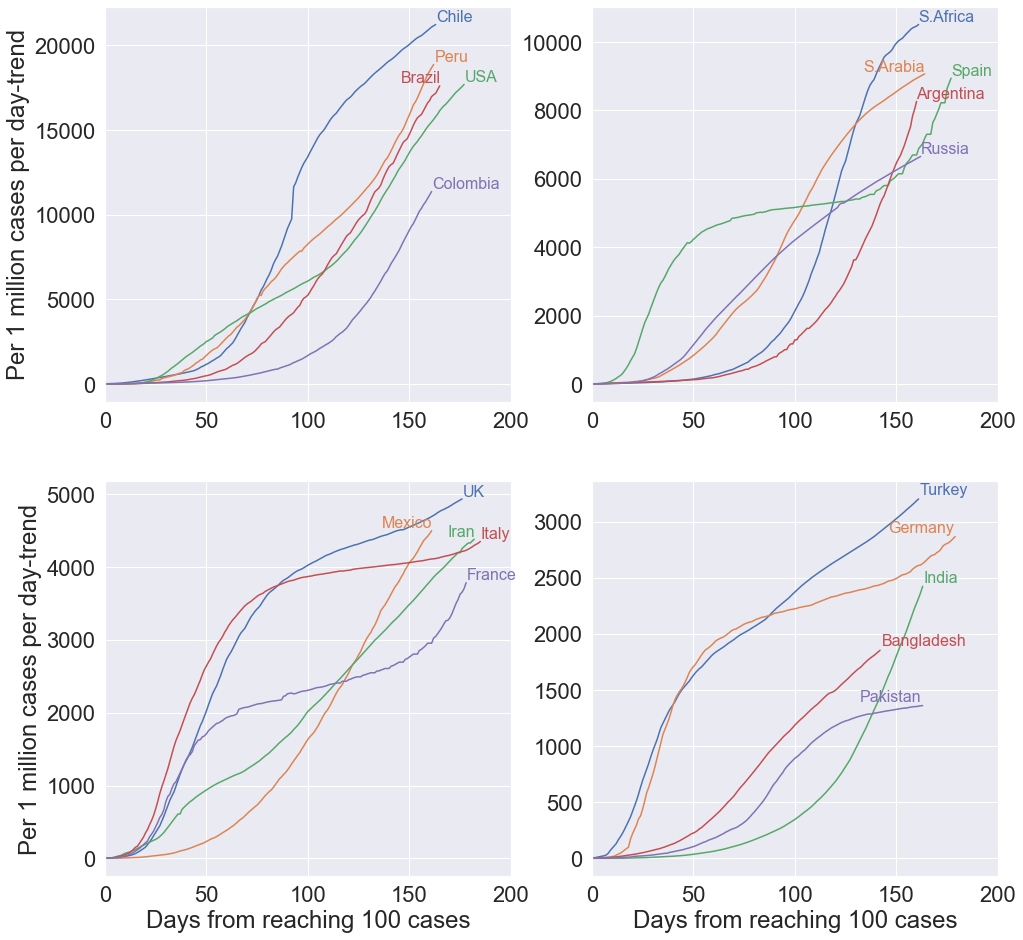

In [34]:
sns.set(rc={'figure.figsize':(16,16)}, font_scale = 2)
fig, axes = plt.subplots(2, 2)

sns.lineplot(x="Days_from_0", y="Cases\_per\_1m", hue="Countries", data=data_1_5, markers=True, hue_order=countries_1_5, legend=False, ax=axes[0, 0])
texts = [axes[0, 0].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Cases\_per\_1m'], str(country), fontsize=16, color=axes[0, 0].get_lines()[countries_1_5.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_1_5]
adjust_text(texts)
axes[0, 0].set_ylabel("Per 1 million cases per day-trend",fontsize=24)

sns.lineplot(x="Days_from_0", y="Cases\_per\_1m", hue="Countries", data=data_6_10, markers=True, hue_order=countries_6_10, legend=False, ax=axes[0, 1])
texts = [axes[0, 1].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Cases\_per\_1m'], str(country), fontsize=16, color=axes[0, 1].get_lines()[countries_6_10.index(country)].get_c(), ha = 'left', va = 'top') for country in countries_6_10]
adjust_text(texts)

sns.lineplot(x="Days_from_0", y="Cases\_per\_1m", hue="Countries", data=data_11_15, markers=True, hue_order=countries_11_15, legend=False, ax=axes[1, 0])
texts = [axes[1, 0].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Cases\_per\_1m'], str(country), fontsize=16, color=axes[1, 0].get_lines()[countries_11_15.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_11_15]
adjust_text(texts)
axes[1, 0].set_ylabel("Per 1 million cases per day-trend",fontsize=24)
axes[1, 0].set_xlabel("Days from reaching 100 cases",fontsize=24)

sns.lineplot(x="Days_from_0", y="Cases\_per\_1m", hue="Countries", data=data_16_20, markers=True, hue_order=countries_16_20, legend=False, ax=axes[1, 1])
texts = [axes[1, 1].text(max_slope.loc[str(country)]['Days_from_0'], max_slope.loc[str(country)]['Cases\_per\_1m'], str(country), fontsize=16, color=axes[1, 1].get_lines()[countries_16_20.index(country)].get_c(), ha = 'left', va = 'center') for country in countries_16_20]
adjust_text(texts)
axes[1, 1].set_xlabel("Days from reaching 100 cases",fontsize=24)

axes[0, 1].set_ylabel("",fontsize=24)
axes[1, 1].set_ylabel("",fontsize=24)
axes[0, 0].set_xlabel("",fontsize=24)
axes[0, 1].set_xlabel("",fontsize=24)
axes[0, 1].set_xlim([0, 200])
axes[1, 1].set_xlim([0, 200])
axes[0, 0].set_xlim([0, 200])
axes[1, 0].set_xlim([0, 200])

plt.savefig('Fig_2_1_Fan_Zheyuan.png')